In [1]:
# Cargamos la librerías
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon,Point
import matplotlib.pyplot as plt
import os

os.chdir("../data")

In [2]:
# Cargamos geometrías a nivel municipio
muni_cdmx = gpd.read_file("muni_cdmx.geojson")
muni_cdmx.to_crs(epsg=4326, inplace= True)
#muni_cdmx.plot(figsize=(10, 10))

# Cargamos datos de carpetas de investigación
carpetas = pd.read_csv("carpetas-de-investigacion-pgj-cdmx.csv.gz")
carpetas


,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
808867,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
808868,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"
808869,808869,2019.0,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÑA,NaN,-99.163384,19.473593,"19.4735930736,-99.163384042"


In [3]:
set(carpetas.delito)


{'ABANDONO DE PERSONA',
 'ABORTO',
 'ABUSO DE AUTORIDAD',
 'ABUSO DE CONFIANZA',
 'ABUSO SEXUAL',
 'ACOSO SEXUAL',
 'ALLANAMIENTO DE MORADA',
 'AMENAZAS',
 'ASOCIACION DELICTUOSA',
 'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)',
 'ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN',
 'ATAQUES A LA PAZ PUBLICA',
 'BIGAMIA',
 'CALUMNIAS',
 'CAMBIO DE USO DE SUELO',
 'COACCION DE SERVIDORES PUBLICOS',
 'COBRANZA ILEGITIMA',
 'COHECHO',
 'CONCUSION',
 'CONTAGIO VENERERO',
 'CONTAMINACIÓN O RESIDUOS',
 'CONTRA EL ESTADO CIVIL',
 'CONTRA FUNCIONARIOS PUBLICOS',
 'CONTRA LA LEY GENERAL DE EXPLOSIVOS',
 'CORRUPCION DE MENORES',
 'CORRUPCION DE MENORES E INCAPACES',
 'DAÑO EN PROPIEDAD AJENA CULPOSA',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES',
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION',
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL',
 'DAÑO 

<AxesSubplot:>

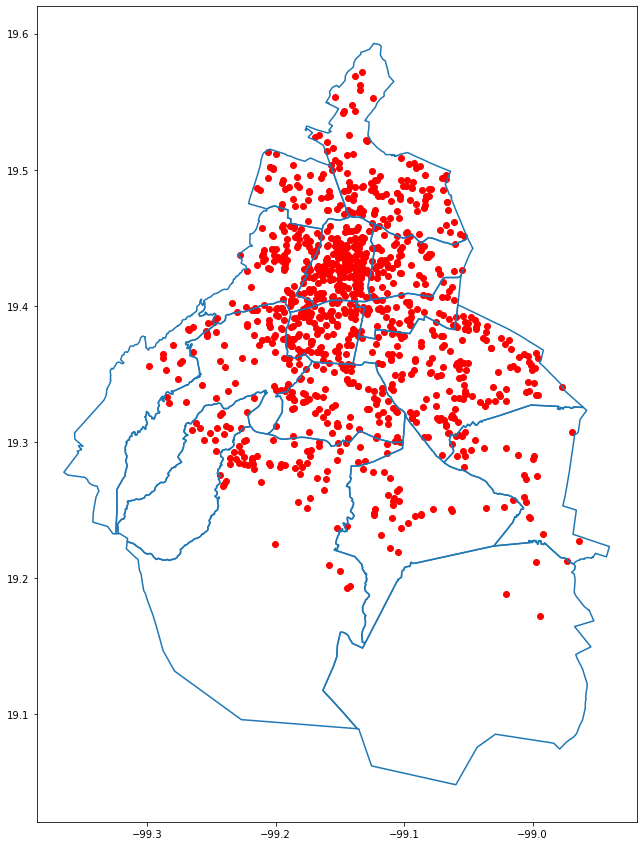

In [4]:
# Nos quedamos sólo con los robos
acoso = carpetas[carpetas["delito"].str.contains("ACOSO SEXUAL")]

puntos_acoso = []

for lon,lat in zip(acoso["longitud"],acoso["latitud"]):
    if lat >19:
        puntos_acoso.append(Point(lon,lat))
gpd_acoso = gpd.GeoDataFrame({'geometry':puntos_acoso}, crs="EPSG:4326")
muni_cdmx.boundary.plot(ax=gpd_acoso.plot(color ='red',figsize=(15, 15)))